In [ ]:
%matplotlib inline

In [24]:
import mne
from mne.minimum_norm import (apply_inverse, apply_inverse_epochs,
                              read_inverse_operator)
from mne.connectivity import seed_target_indices, spectral_connectivity
from mne.preprocessing import run_ica

raw = mne.io.read_raw_eeglab('Exp3_1.set')  # load data  
events=mne.find_events(raw)
#events = mne.read_events('experiment3_annotations.txt')
#epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,baseline=(None, 0), reject=dict(mag=4e-12, grad=4000e-13, eog=150e-6))
event_id = dict(Trigger960=960,Trigger7=7,Trigger8=8,Trigger9=9,Trigger131=131,Trigger132=132,Trigger133=133,Trigger9100=9100,
Trigger134=134,Trigger136=136,Trigger137=137,Trigger991=991,Trigger139=139,Trigger1310=1310,Trigger955=955,Trigger1311=1311)  # event trigger and conditions
events=mne.find_events(raw)



print events
"""ica=run_ica(raw, n_components=1, max_pca_components=78, n_pca_components=78, noise_cov=None, 
    random_state=None, picks=None, start=None, stop=None, start_find=None, stop_find=None, 
    ecg_ch=None, ecg_criterion=0.1, eog_ch=None, 
    eog_criterion=0.1, skew_criterion=-1, kurt_criterion=-1, var_criterion=0, add_nodes=None, verbose=None)"""



23/23 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
As is, the trigger channel will consist entirely of zeros.
Reading Exp3_1.fdt


<ipython-input-24-779a03f721ff>:7: RuntimeWarning: 23/23 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab('Exp3_1.set')  # load data
<ipython-input-24-779a03f721ff>:7: RuntimeWarning: As is, the trigger channel will consist entirely of zeros.
  raw = mne.io.read_raw_eeglab('Exp3_1.set')  # load data


[]


'ica=run_ica(raw, n_components=1, max_pca_components=78, n_pca_components=78, noise_cov=None, \n    random_state=None, picks=None, start=None, stop=None, start_find=None, stop_find=None, \n    ecg_ch=None, ecg_criterion=0.1, eog_ch=None, \n    eog_criterion=0.1, skew_criterion=-1, kurt_criterion=-1, var_criterion=0, add_nodes=None, verbose=None)'

<RawEEGLAB  |  Exp3_1.fdt, n_channels x n_times : 33 x 4829184 (2358.0 sec), ~70 kB, data not loaded>
<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | 1-A1, 1-A2, 1-A3, 1-A4, 1-A5, 1-A6, 1-A7, 1-A8, 1-A9, ...
    chs : list | 33 items (EEG: 32, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 1024.0 Hz
    meas_date : numpy.ndarray | 1970-01-01 01:00:00
    nchan : int | 33
    projs : list | 0 items
    sfreq : float | 2048.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    m

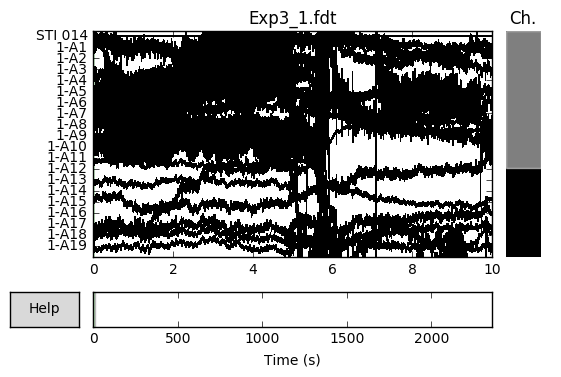

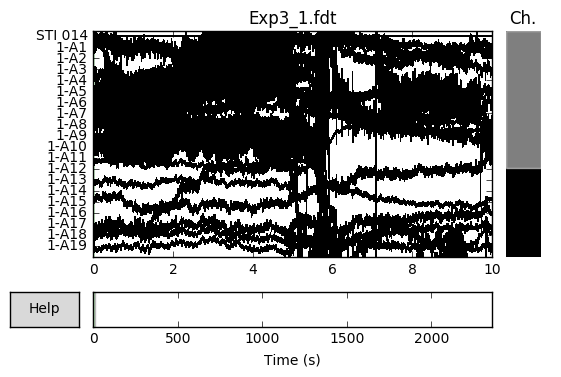

In [21]:
print(raw)
print(raw.info)
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:32:3, start:stop]  # access underlying data
raw.plot()


In [25]:
import numpy as np  # noqa
n_cycles = 2  # number of cycles in Morlet wavelet
freqs = np.arange(7, 30, 3)  # frequencies of interest
from mne.time_frequency import tfr_morlet  # noqa
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)
power.plot([power.ch_names.index('MEG 1332')])

NameError: name 'epochs' is not defined

In [2]:
from mne.preprocessing import ICA

ica.save("exp1-ica.fif")

Writing ica solution to exp1-ica.fif...


<ICA  |  raw data decomposition, fit (fastica): 4814848 samples, 1 components, channels used: "eeg", 1 sources marked for exclusion>

In [10]:

#rest epochs
eog=mne.Epochs(raw, events, 7, 0, 20, baseline=(None, 0))
emg=mne.Epochs(raw, events, 8, 0, 20, baseline=(None, 0))
noise=mne.epochs.concatenate_epochs([eog,emg])
rest = mne.Epochs(raw, events, 9, 0, 15, baseline=(None, 0))
rest1= mne.Epochs(raw, events, 960, 0, 60, baseline=(None, 0))
rest2= mne.Epochs(raw, events, 9115, 0, 115, baseline=(None, 0))
rest3= mne.Epochs(raw, events, 9100, 0, 100, baseline=(None, 0))
rest4= mne.Epochs(raw, events, 991, 0, 91, baseline=(None, 0))
r=[rest,rest1,rest2,rest3,rest4]
stim1 = mne.Epochs(raw, events, 131, 0, 144, baseline=(None, 0))
stim2 = mne.Epochs(raw, events, 132, 0, 103, baseline=(None, 0))
stim3 = mne.Epochs(raw, events, 133, 0, 119, baseline=(None, 0))
stim4 = mne.Epochs(raw, events, 134, 0, 171, baseline=(None, 0))

stim5 = mne.Epochs(raw, events, 136, 0, 94, baseline=(None, 0))
stim6 = mne.Epochs(raw, events, 137, 0, 279, baseline=(None, 0))

stim7 = mne.Epochs(raw, events, 139, 0, 180, baseline=(None, 0))
stim8 = mne.Epochs(raw, events, 1310, 0, 107, baseline=(None, 0))
stim9 = mne.Epochs(raw, events, 1311, 0, 286, baseline=(None, 0))
s=[stim1,stim2,stim3,stim4,stim5,stim6,stim7,stim8,stim9]

ValueError: event_id must be dict or int.

In [7]:
#evoked = epochs.average()  # compute evoked  
#evoked.plot()  # butterfly plot the evoked data 
#cov = mne.compute_covariance(epochs, tmax=0, method='shrunk')  
#ica = run_ica(epochs)

"""ica=run_ica(epochs, n_components=1, max_pca_components=50, n_pca_components=64, noise_cov=None, 
    random_state=None, picks=None, start=None, stop=None, start_find=None, stop_find=None, 
    ecg_ch=None, ecg_criterion=0.1, eog_ch=None, 
    eog_criterion=0.1, skew_criterion=-1, kurt_criterion=-1, var_criterion=0, add_nodes=None, verbose=None)

"""
coh_dump=[]
freqs_dump=[]
times_dump=[]

#snr = 3.0
#lambda2 = 1.0 / snr ** 2
#evoked = epochs.average()
#stc = apply_inverse(evoked, inverse_operator, lambda2, "dSPM",pick_ori="normal")
    
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest1, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=4)
coh_dump.extend(coh)
freqs_dump.extend(freqs)
times_dump.extend(times)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest2, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=4)
coh_dump.extend(coh)
freqs_dump.extend(freqs)
times_dump.extend(times)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest3, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=4)
coh_dump.extend(coh)
freqs_dump.extend(freqs)
times_dump.extend(times)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest4, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=4)
coh_dump.extend(coh)
freqs_dump.extend(freqs)
times_dump.extend(times)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=4)
coh_dump.extend(coh)
freqs_dump.extend(freqs)
times_dump.extend(times)

coh_rest=coh_dump
freqs_rest=freqs_dump
times_rest=times_dump
coh_dump=[]
freqs_rest=[]




Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..60.000s for estimation (122881 points)
    frequencies: 0.1Hz..49.0Hz (2936 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   36.2s finished


    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..115.000s for estimation (235521 points)
    frequencies: 0.0Hz..49.0Hz (5631 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    5.8s finished


    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..100.000s for estimation (204801 points)
    frequencies: 0.1Hz..49.0Hz (4895 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   21.1s finished


    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..91.000s for estimation (186369 points)
    frequencies: 0.1Hz..49.0Hz (4455 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    4.8s finished


    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..15.000s for estimation (30721 points)
    frequencies: 0.3Hz..49.0Hz (731 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..4


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.6s finished


    computing connectivity for epochs 5..8


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.6s remaining:    2.6s


    computing connectivity for epochs 9..8


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done   0 out of   0 | elapsed:    0.0s finished


    assembling connectivity matrix
[Connectivity computation done]


In [9]:

con, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest1, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=12)




Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..60.000s for estimation (122881 points)
    frequencies: 0.1Hz..49.0Hz (2936 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epochs 1..1


[Parallel(n_jobs=12)]: Done   1 out of   1 | elapsed:   37.2s finished


    assembling connectivity matrix
[Connectivity computation done]


NameError: name 'plt' is not defined

In [10]:
import matplotlib.pyplot as plt
n_rows, n_cols = con.shape[:2]
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True)
plt.suptitle('Between labels connectivity')
for i in range(n_rows):
    for j in range(i + 1):
        if i == j:
            axes[i, j].set_axis_off()
            continue

        axes[i, j].plot(freqs, con[i, j, :])
        axes[j, i].plot(freqs, con[i, j, :])

        if j == 0:
            axes[i, j].set_ylabel(names[i])
            axes[0, i].set_title(names[i])
        if i == (n_rows - 1):
            axes[i, j].set_xlabel(names[j])
        axes[i, j].set_xlim([fmin, fmax])
        axes[j, i].set_xlim([fmin, fmax])

        # Show band limits
        for f in [8, 12, 18, 35]:
            axes[i, j].axvline(f, color='k')
            axes[j, i].axvline(f, color='k')
plt.show()

KeyboardInterrupt: 

In [9]:
#TESTLINE!!!!!!!

coh_dump=[]
freqs_dump=[]
times_dump=[]
import time
#snr = 3.0
#lambda2 = 1.0 / snr ** 2
#evoked = epochs.average()
#stc = apply_inverse(evoked, inverse_operator, lambda2, "dSPM",pick_ori="normal")
timer=time.time()    
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rest1, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=12)
coh_dump.extend(coh)
print (time.time()-timer)
freqs_dump.extend(freqs)
times_dump.extend(times)

Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..60.000s for estimation (122881 points)
    frequencies: 0.1Hz..49.0Hz (2936 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
34.7119998932


In [16]:
#TESTLINE!!!!!!!

layout = raw.set_montage("cap_32_layout_medium.jpg")  # use full layout

tfr = AverageTFR(rest.info, coh_rest, times, freqs_rest, len(epochs))
tfr.plot_topo(fig_facecolor='w', font_color='k', border='k')

TypeError: Montage must be a 'Montage' or 'DigMontage' instead of '<type 'str'>'.

In [11]:
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim1, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim2, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim3, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim4, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim5, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim6, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim7, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim8, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(stim9, method='wpli', mode='fourier', fmax=49, faverage=True, n_jobs=1)
coh_dump.extend(coh)
freqs_dump.extend(coh)
coh_stim=coh_dump
freqs_stim=freqs_dump

Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..144.000s for estimation (294913 points)
    frequencies: 0.0Hz..49.0Hz (7052 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..103.000s for estimation (210945 points)
    frequencies: 0.0Hz..49.0Hz (5043 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 3081 connections
    using t=0.000s..119.000s f